In [2]:
import os
os.chdir("C:/Users/pitak/Desktop/DigitalHuman-Speak")
import script.util.TextProcessingUtil as tpu
import script.util.VoiceProcessingUtil as vpu
import speech_recognition as sr
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
%matplotlib inline

In [3]:
PATH = "data/Test/aa.wav"

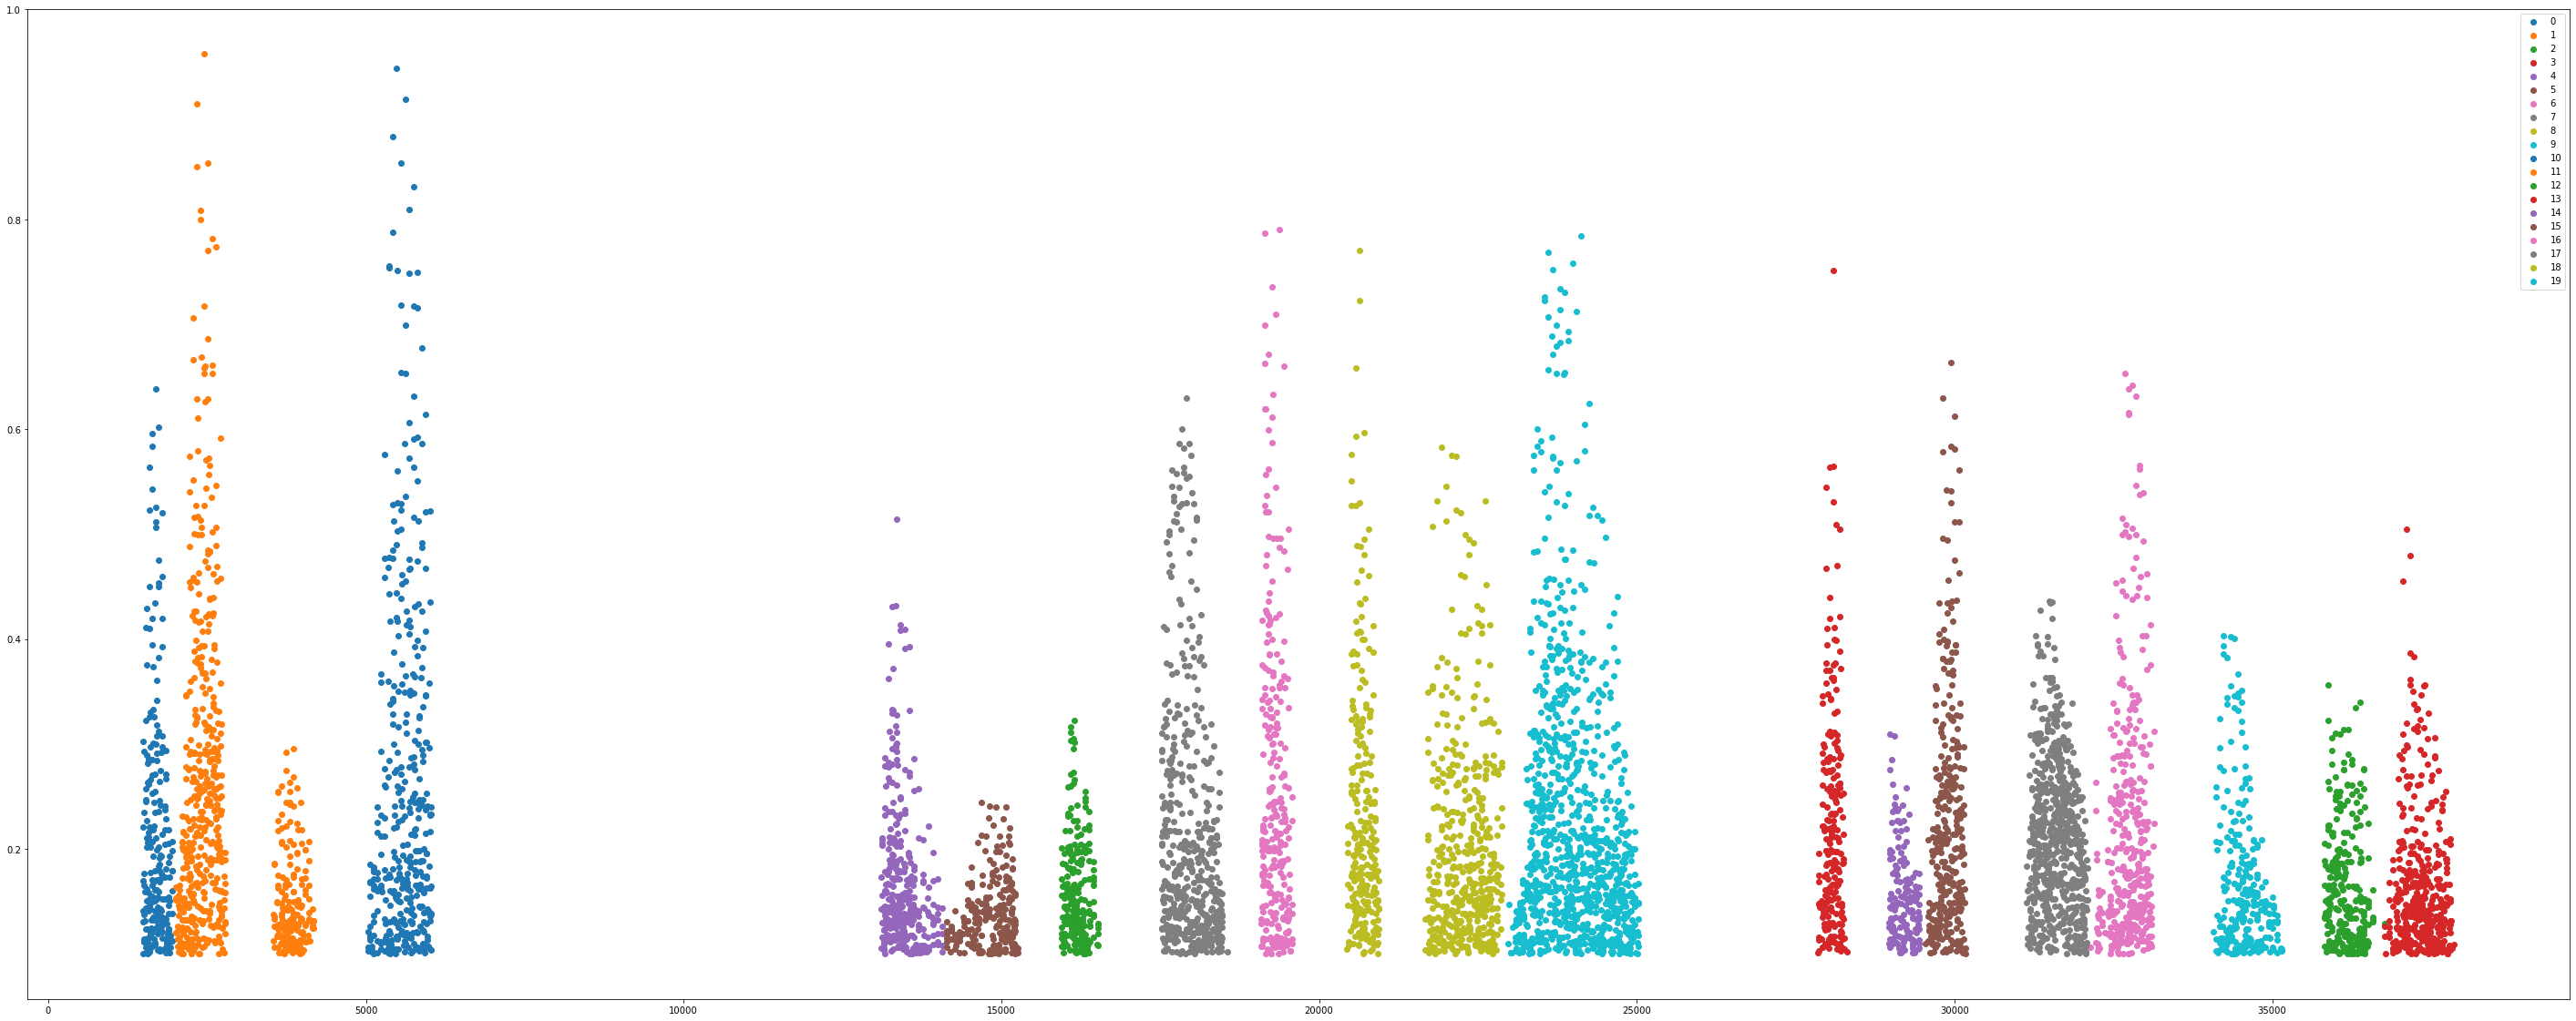

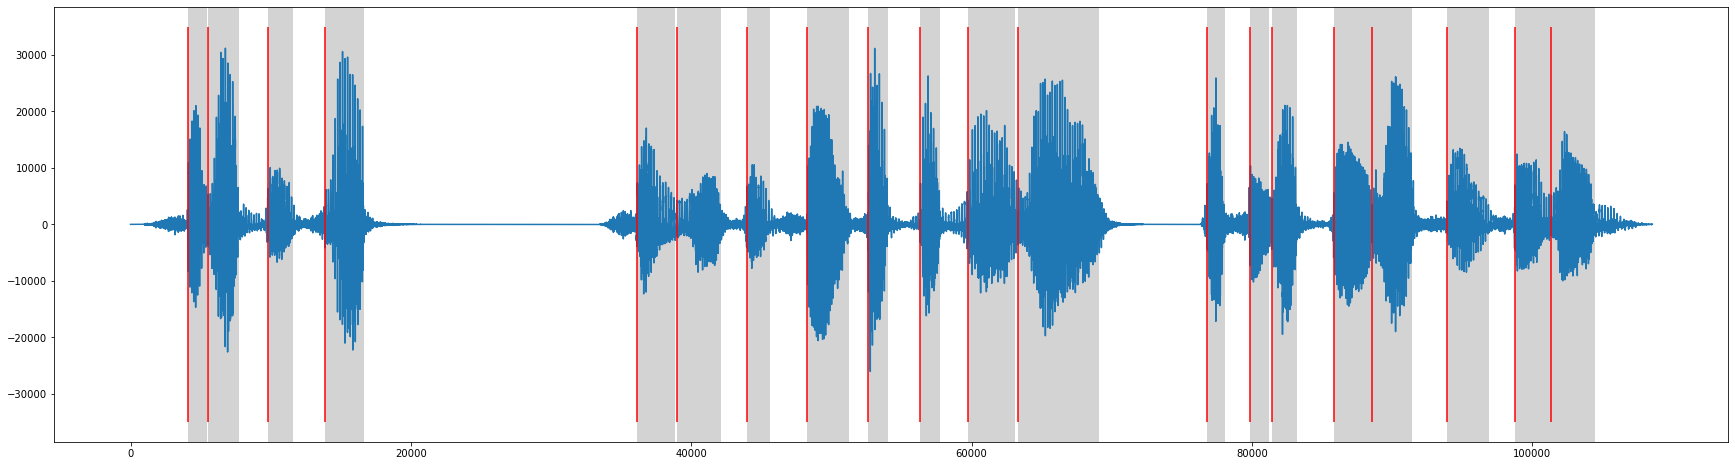

[[0.18675, 0.244875],
 [0.251, 0.348125],
 [0.443625, 0.521375],
 [0.628625, 0.75325],
 [1.638375, 1.759],
 [1.767, 1.907875],
 [1.993, 2.064875],
 [2.19, 2.31975],
 [2.386625, 2.447875],
 [2.555375, 2.616875],
 [2.708125, 2.859],
 [2.871875, 3.1285],
 [3.482125, 3.538125],
 [3.621, 3.6805],
 [3.693, 3.7715],
 [3.892, 4.0115],
 [4.017125, 4.14225],
 [4.259, 4.393],
 [4.477625, 4.596625],
 [4.596875, 4.733125]]

<Figure size 432x288 with 0 Axes>

In [4]:
vpu.get_voice_syllables(
    from_file=True,
    audio_path=PATH,
    algorithm="hdbscan",
    gen_plot=True,
    # gen_voice=True,
    # gen_voice_start=5,
    # gen_voice_end=15,
    )

In [5]:
data, Fs = librosa.load(PATH, sr=8000)

In [6]:
Fs

8000

In [7]:
recog = sr.Recognizer()
speech = sr.AudioFile(PATH)
with speech as source:
    audio = recog.listen(source)
text = recog.recognize_google(audio,language='th')
print(text)

สวัสดีครับเสียงนี้ถูกสร้างจากบอร์ดน้อย Voice และขยับด้วย iPhone 7


In [8]:
syls = tpu.get_text_syllables(text=text)
syls

['สวัส',
 'ดี',
 'ครับ',
 'เสียง',
 'นี้',
 'ถูก',
 'สร้าง',
 'จาก',
 'บอร์ด',
 'น้อย',
 ' Voice ',
 'และ',
 'ขยับ',
 'ด้วย',
 ' iPhone 7']

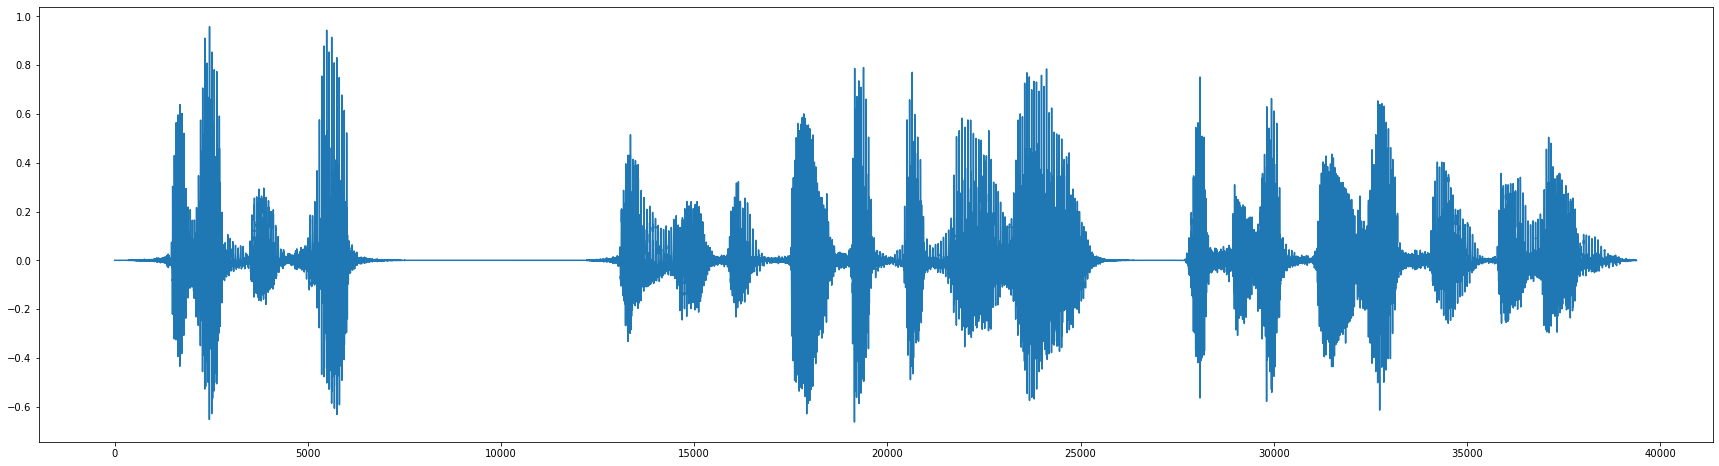

In [9]:
plt.figure(figsize=(30,8))
plt.plot(data)
plt.show()

C:\Users\pitak\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


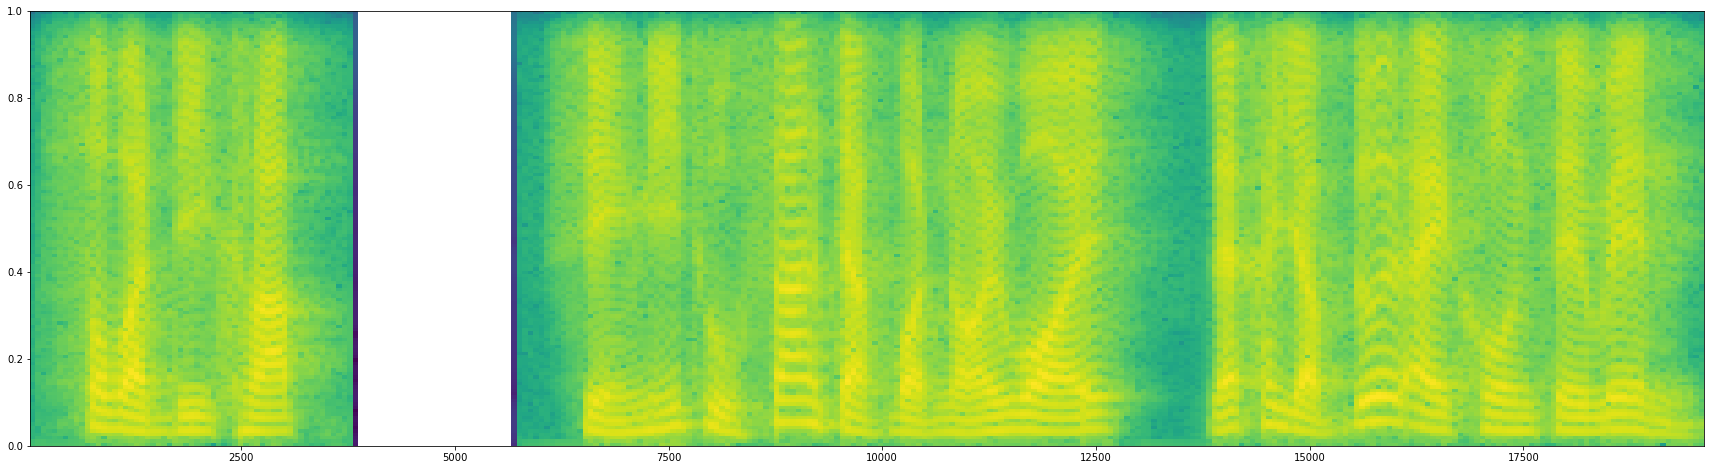

In [10]:
plt.figure(figsize=(30,8))
plt.specgram(data)
plt.show()

In [11]:
cut = 0.0
newdata = [i if (i > cut) else 0 for i in abs(data)]

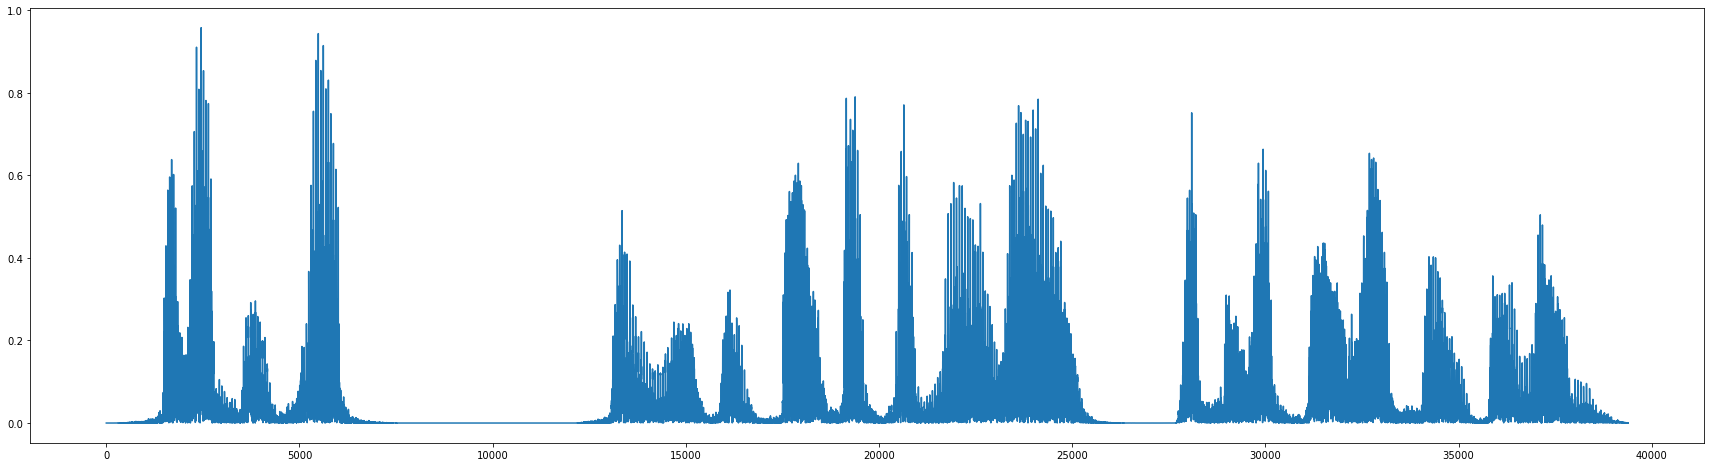

In [12]:
plt.figure(figsize=(30,8))
plt.plot(newdata)
plt.show()

In [13]:
cluster_data = []
for i in range(len(newdata)):
    if newdata[i] > 0.1:
        cluster_data.append([i,newdata[i]])
cluster_data  = np.array(cluster_data)
cluster_data

array([[1.49400000e+03, 1.41550586e-01],
       [1.49500000e+03, 1.30769670e-01],
       [1.49600000e+03, 2.20853716e-01],
       ...,
       [3.78650000e+04, 1.08891889e-01],
       [3.80180000e+04, 1.05920866e-01],
       [3.80900000e+04, 1.03338450e-01]])

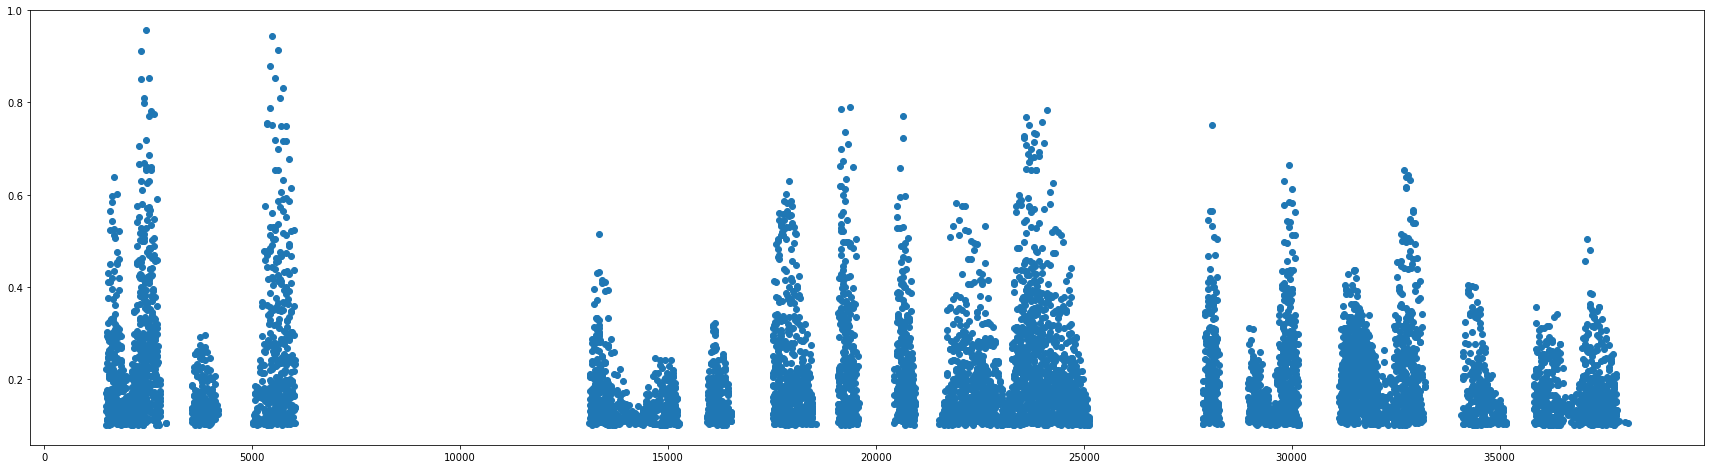

In [14]:
plt.figure(figsize=(30,8))
plt.scatter(list(map(lambda c: c[0],cluster_data)),list(map(lambda c: c[1],cluster_data)))
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters=14, 
    n_init=20,
    max_iter=6900,
    random_state=690,
    )
label = model.fit_predict(cluster_data)

In [ ]:
u_labels = np.unique(label)
plt.figure(figsize=(50,20))
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
from hdbscan import HDBSCAN
model = HDBSCAN(
    min_cluster_size=51,
    min_samples=None,
    algorithm="best")
label = model.fit_predict(cluster_data)

In [ ]:
u_labels = np.unique(label)
u_labels = np.delete(u_labels,np.where(u_labels==-1))
plt.figure(figsize=(50,20))
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
clusters = []
for i in u_labels:
    if(len(cluster_data[label == i]) > 0):
        clusters.append([int(cluster_data[label == i , 0].min()),int(cluster_data[label == i , 0].max())])
clusters = sorted(clusters)
clusters

In [ ]:
evaFs,evawav = wav.read(PATH)

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(evawav,zorder=2)
plt.vlines(
    list(map(lambda e: int(e[0]*(evaFs/Fs)),clusters)),
    ymin=30000,
    ymax=-30000,
    colors="r",
    zorder=3)
for e in clusters:
    plt.axvspan(e[0]*(evaFs/Fs),e[1]*(evaFs/Fs),color="lightgray",zorder=1)
plt.show()  

In [ ]:
# c = clusters[0]
# e = clusters[14]
# wav.write("d.wav",evaFs,evawav[c[0]*int(evaFs/Fs):e[1]*int(evaFs/Fs)])